# Data Preparation


In [ ]:
#!/usr/bin/env python3
# Download the 56 zip files in Images_png in batches
import urllib.request

# URLs for the zip files
links = [
    'https://nihcc.box.com/shared/static/vfk49d74nhbxq3nqjg0900w5nvkorp5c.gz',
    'https://nihcc.box.com/shared/static/i28rlmbvmfjbl8p2n3ril0pptcmcu9d1.gz',
    'https://nihcc.box.com/shared/static/f1t00wrtdk94satdfb9olcolqx20z2jp.gz',
	'https://nihcc.box.com/shared/static/0aowwzs5lhjrceb3qp67ahp0rd1l1etg.gz',
    'https://nihcc.box.com/shared/static/v5e3goj22zr6h8tzualxfsqlqaygfbsn.gz',
	'https://nihcc.box.com/shared/static/asi7ikud9jwnkrnkj99jnpfkjdes7l6l.gz',
	'https://nihcc.box.com/shared/static/jn1b4mw4n6lnh74ovmcjb8y48h8xj07n.gz',
    'https://nihcc.box.com/shared/static/tvpxmn7qyrgl0w8wfh9kqfjskv6nmm1j.gz',
	'https://nihcc.box.com/shared/static/upyy3ml7qdumlgk2rfcvlb9k6gvqq2pj.gz',
	'https://nihcc.box.com/shared/static/l6nilvfa9cg3s28tqv1qc1olm3gnz54p.gz',
	'https://nihcc.box.com/shared/static/hhq8fkdgvcari67vfhs7ppg2w6ni4jze.gz',
	'https://nihcc.box.com/shared/static/ioqwiy20ihqwyr8pf4c24eazhh281pbu.gz'
]

for idx, link in enumerate(links):
    fn = 'images_%02d.tar.gz' % (idx+1)
    print('downloading'+fn+'...')
    urllib.request.urlretrieve(link, fn)  # download the zip file

print("Download complete. Please check the checksums")

downloadingimages_01.tar.gz...
downloadingimages_02.tar.gz...
downloadingimages_03.tar.gz...
downloadingimages_04.tar.gz...
downloadingimages_05.tar.gz...
downloadingimages_06.tar.gz...


ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.


KeyboardInterrupt



In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!cp /content/images_12.tar.gz /content/drive/MyDrive/code/image_compressed/

# Data Preprocessing

In [11]:
# Extract the downloaded tar.gz files
import tarfile
for idx in range(1, 13):
    fn = '/content/drive/MyDrive/uni/code/image_compressed/images_%02d.tar.gz' % idx
    print('extracting '+fn+'...')
    with tarfile.open(fn, 'r:gz') as tar:
        tar.extractall('')  # extract the contents of the zip file


extracting /content/drive/MyDrive/uni/code/image_compressed/images_01.tar.gz...
extracting /content/drive/MyDrive/uni/code/image_compressed/images_02.tar.gz...
extracting /content/drive/MyDrive/uni/code/image_compressed/images_03.tar.gz...
extracting /content/drive/MyDrive/uni/code/image_compressed/images_04.tar.gz...
extracting /content/drive/MyDrive/uni/code/image_compressed/images_05.tar.gz...
extracting /content/drive/MyDrive/uni/code/image_compressed/images_06.tar.gz...
extracting /content/drive/MyDrive/uni/code/image_compressed/images_07.tar.gz...
extracting /content/drive/MyDrive/uni/code/image_compressed/images_08.tar.gz...
extracting /content/drive/MyDrive/uni/code/image_compressed/images_09.tar.gz...
extracting /content/drive/MyDrive/uni/code/image_compressed/images_10.tar.gz...
extracting /content/drive/MyDrive/uni/code/image_compressed/images_11.tar.gz...
extracting /content/drive/MyDrive/uni/code/image_compressed/images_12.tar.gz...


In [ ]:
import tarfile
from google.colab import drive
import os


# Step 2: Define extraction path in your Drive
extract_path = '/content/drive/MyDrive/code/images_extracted'  # change if needed
os.makedirs(extract_path, exist_ok=True)

# Step 3: Loop through and extract each tar.gz file into Drive
for idx in range(12, 13):
    fn = 'images_%02d.tar.gz' % idx  # e.g., images_01.tar.gz
    print('Extracting ' + fn + '...')
    with tarfile.open(fn, 'r:gz') as tar:
        tar.extractall(extract_path)

print("All files extracted to:", extract_path)


Extracting images_12.tar.gz...
✅ All files extracted to: /content/drive/MyDrive/code/images_extracted


In [12]:
# Load and process CSV labels for multi-label classification
import pandas as pd
import numpy as np

# Load CSV files
train_csv = "/content/drive/MyDrive/uni/code/Disease-Diagnosis-Deep-Learning/PruneCXR/miccai2023_nih-cxr-lt_labels_train.csv"
val_csv = "/content/drive/MyDrive/uni/code/Disease-Diagnosis-Deep-Learning/PruneCXR/miccai2023_nih-cxr-lt_labels_val.csv"
test_csv = "/content/drive/MyDrive/uni/code/Disease-Diagnosis-Deep-Learning/PruneCXR/miccai2023_nih-cxr-lt_labels_test.csv"

train_df = pd.read_csv(train_csv)
val_df = pd.read_csv(val_csv)
test_df = pd.read_csv(test_csv)

print(f"Train dataset: {len(train_df)} images")
print(f"Validation dataset: {len(val_df)} images")
print(f"Test dataset: {len(test_df)} images")

# Get disease class names (exclude 'id' and 'subj_id' columns)
label_columns = [col for col in train_df.columns if col not in ['id', 'subj_id']]
num_classes = len(label_columns)

print(f"\nNumber of disease classes: {num_classes}")
print(f"Disease classes: {label_columns}")

# Check for class imbalance
class_counts = train_df[label_columns].sum()
print(f"\nClass distribution in training set:")
for i, (disease, count) in enumerate(class_counts.items()):
    percentage = (count / len(train_df)) * 100
    print(f"{i+1:2d}. {disease:20s}: {count:5d} ({percentage:5.2f}%)")

# Show data structure
print(f"\nSample data structure:")
print(train_df.head())

# Verify data integrity
print(f"\nData integrity check:")
print(f"Missing values in train: {train_df.isnull().sum().sum()}")
print(f"Missing values in val: {val_df.isnull().sum().sum()}")
print(f"Missing values in test: {test_df.isnull().sum().sum()}")


Train dataset: 78506 images
Validation dataset: 12533 images
Test dataset: 21081 images

Number of disease classes: 20
Disease classes: ['Atelectasis', 'Cardiomegaly', 'Consolidation', 'Edema', 'Effusion', 'Emphysema', 'Fibrosis', 'Hernia', 'Infiltration', 'Mass', 'Nodule', 'Pleural Thickening', 'Pneumonia', 'Pneumothorax', 'Pneumoperitoneum', 'Pneumomediastinum', 'Subcutaneous Emphysema', 'Tortuous Aorta', 'Calcification of the Aorta', 'No Finding']

Class distribution in training set:
 1. Atelectasis         :  7587 ( 9.66%)
 2. Cardiomegaly        :  1590 ( 2.03%)
 3. Consolidation       :  2626 ( 3.34%)
 4. Edema               :  1283 ( 1.63%)
 5. Effusion            :  7919 (10.09%)
 6. Emphysema           :  1327 ( 1.69%)
 7. Fibrosis            :  1138 ( 1.45%)
 8. Hernia              :   130 ( 0.17%)
 9. Infiltration        : 12739 (16.23%)
10. Mass                :  3689 ( 4.70%)
11. Nodule              :  4359 ( 5.55%)
12. Pleural Thickening  :  1998 ( 2.55%)
13. Pneumonia   


Dataset Summary:
Train: 78506 images
Validation: 12533 images
Test: 21081 images
Classes: 20
Batch size: 64

Testing loaded data
Batch shape: torch.Size([64, 3, 224, 224])
Labels shape: torch.Size([64, 20])
Image range: [-2.118, 2.640]


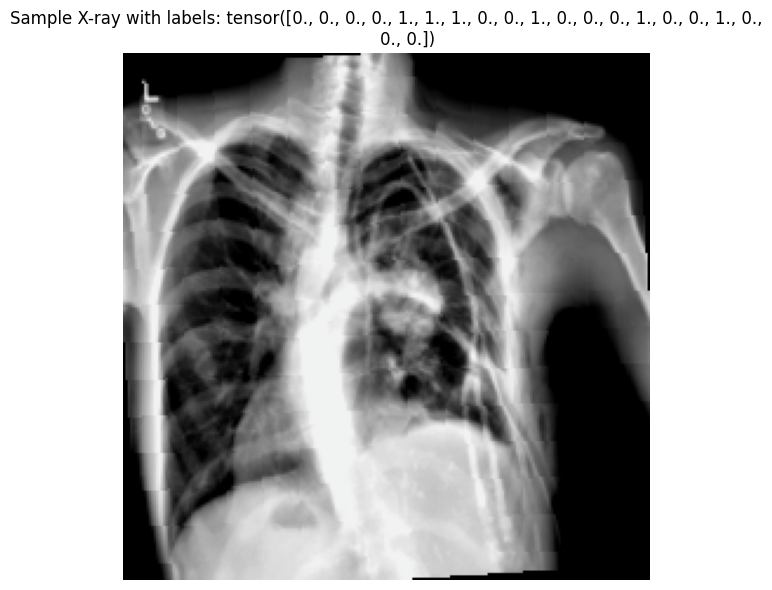

In [14]:
import torch
from torch.utils.data import Dataset, DataLoader
import pandas as pd
from PIL import Image
import os
from torchvision import transforms
import matplotlib.pyplot as plt
import cv2
import numpy as np

class ChestXrayDataset(Dataset):

    def enhance_image(self, img_path):
        img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)

        # Apply CLAHE for local contrast enhancement
        clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
        enhanced = clahe.apply(img)

        # Gamma correction for low brightness (gamma > 1 darkens, < 1 brightens)
        gamma = 1.2  # Increase gamma to darken image for low brightness effect

        look_up = np.array([((i / 255.0) ** (1.0 / gamma)) * 255 for i in np.arange(0, 256)]).astype("uint8")
        adjusted = cv2.LUT(enhanced, look_up)

        # Convert to RGB for pretrained DenseNet
        rgb = cv2.cvtColor(adjusted, cv2.COLOR_GRAY2RGB)
        return Image.fromarray(rgb)


    def __init__(self, csv_file, image_dir, transform=None):
        self.df = pd.read_csv(csv_file)
        self.image_dir = image_dir
        self.transform = transform
        # Get disease columns (exclude 'id' and 'subj_id')
        self.label_columns = [col for col in self.df.columns if col not in ['id', 'subj_id']]
        self.num_classes = len(self.label_columns)
        self.class_names = self.label_columns

    def __len__(self):
        return len(self.df)

    def __getitem__(self, idx):
        row = self.df.iloc[idx]

        # Load and process image
        img_path = os.path.join(self.image_dir, row['id'])
        try:
            # Enhance image using CLAHE, gamma correction, and RGB conversion
            image = self.enhance_image(img_path)
        except Exception as e:
            # Fallback for missing images
            print(f"Could not load {img_path}, using blank image")
            image = Image.new('RGB', (224, 224), 0)

        # Get multi-hot encoded labels
        labels = torch.tensor(row[self.label_columns].values.astype(float), dtype=torch.float32)

        if self.transform:
            image = self.transform(image)

        return image, labels




# Training transforms with augmentation
train_transform = transforms.Compose([
    transforms.Resize((256, 256)),                    # Resize to larger size first
    transforms.RandomResizedCrop(224, scale=(0.8, 1.0)),  # Random crop with scaling
    transforms.RandomHorizontalFlip(0.5),            # Horizontal flip
    transforms.RandomRotation(10),                    # Small rotation
    transforms.ColorJitter(brightness=0.05, contrast=0.6),  # Subtle color changes
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])  # ImageNet stats
])

# Validation/test transforms (no augmentation)
val_transform = transforms.Compose([
    transforms.Resize((224, 224)),                    # Direct resize
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

train_dataset = ChestXrayDataset(train_csv, "/content/images", transform=train_transform)
val_dataset = ChestXrayDataset(val_csv, "/content/images", transform=val_transform)
test_dataset = ChestXrayDataset(test_csv, "/content/images", transform=val_transform)

# Create data loaders (optimized for DenseNet-121)
batch_size = 64  # Optimal for DenseNet-121 training
num_workers = 4  # Use 0 for Jupyter notebooks to avoid multiprocessing issues

train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True, num_workers=num_workers, pin_memory=True)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False, num_workers=num_workers, pin_memory=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False, num_workers=num_workers, pin_memory=True)

# Print dataset information
print(f"\nDataset Summary:")
print(f"Train: {len(train_dataset)} images")
print(f"Validation: {len(val_dataset)} images")
print(f"Test: {len(test_dataset)} images")
print(f"Classes: {train_dataset.num_classes}")
print(f"Batch size: {batch_size}")

# Test data loading
print("\nTesting loaded data")
sample_images, sample_labels = next(iter(train_loader))
print(f"Batch shape: {sample_images.shape}")
print(f"Labels shape: {sample_labels.shape}")
print(f"Image range: [{sample_images.min():.3f}, {sample_images.max():.3f}]")

# Show sample image and labels
plt.figure(figsize=(8, 6))
img_to_show = sample_images[15]  # Use the second image in the batch
# Denormalize for display
img_denorm = img_to_show * torch.tensor([0.229, 0.224, 0.225]).view(3, 1, 1) + torch.tensor([0.485, 0.456, 0.406]).view(3, 1, 1)
img_denorm = torch.clamp(img_denorm, 0, 1)

plt.imshow(img_denorm.permute(1, 2, 0))
plt.title(f"Sample X-ray with labels: {sample_labels[15]}")
plt.axis('off')
plt.tight_layout()
plt.show()



# Model Creation and Training

In [ ]:
# DenseNet-121 Model Creation for Multi-Label Medical Image Classification

import torch
import torch.nn as nn

# Device configuration
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f"Using device: {device}")

class DenseBlock(nn.Module):
    def __init__(self, num_layers, in_channels, growth_rate, bn_size=4, dropout_rate=0.0):
        super(DenseBlock, self).__init__()
        self.layers = nn.ModuleList()
        for i in range(num_layers):
            layer = self._make_layer(in_channels + i * growth_rate, growth_rate, bn_size, dropout_rate)
            self.layers.append(layer)
    def _make_layer(self, in_channels, growth_rate, bn_size, dropout_rate):
        layer = nn.Sequential(
            nn.BatchNorm2d(in_channels),
            nn.ReLU(inplace=True),
            nn.Conv2d(in_channels, bn_size * growth_rate, kernel_size=1, bias=False),
            nn.BatchNorm2d(bn_size * growth_rate),
            nn.ReLU(inplace=True),
            nn.Conv2d(bn_size * growth_rate, growth_rate, kernel_size=3, padding=1, bias=False)
        )
        if dropout_rate > 0:
            layer.add_module('dropout', nn.Dropout(dropout_rate))
        return layer
    def forward(self, x):
        features = [x]
        for layer in self.layers:
            new_feature = layer(torch.cat(features, 1))
            features.append(new_feature)
        return torch.cat(features, 1)

class TransitionLayer(nn.Module):
    def __init__(self, in_channels, out_channels):
        super(TransitionLayer, self).__init__()
        self.features = nn.Sequential(
            nn.BatchNorm2d(in_channels),
            nn.ReLU(inplace=True),
            nn.Conv2d(in_channels, out_channels, kernel_size=1, bias=False),
            nn.AvgPool2d(kernel_size=2, stride=2)
        )
    def forward(self, x):
        return self.features(x)

class DenseNet121MultiLabel(nn.Module):
    def __init__(self, num_classes=20, growth_rate=32, num_init_features=64, dropout_rate=0.5):
        super(DenseNet121MultiLabel, self).__init__()
        self.features = nn.Sequential(
            nn.Conv2d(3, num_init_features, kernel_size=7, stride=2, padding=3, bias=False),
            nn.BatchNorm2d(num_init_features),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=3, stride=2, padding=1)
        )
        num_features = num_init_features
        block_config = [6, 12, 24, 16]
        for i, num_layers in enumerate(block_config):
            block = DenseBlock(num_layers, num_features, growth_rate, dropout_rate=dropout_rate)
            self.features.add_module(f'denseblock{i+1}', block)
            num_features += num_layers * growth_rate
            if i != len(block_config) - 1:
                trans = TransitionLayer(num_features, num_features // 2)
                self.features.add_module(f'transition{i+1}', trans)
                num_features = num_features // 2
        self.features.add_module('norm5', nn.BatchNorm2d(num_features))
        self.features.add_module('relu5', nn.ReLU(inplace=True))
        self.avgpool = nn.AdaptiveAvgPool2d((1, 1))
        self.classifier = nn.Sequential(
            nn.Dropout(dropout_rate),
            nn.Linear(num_features, num_classes)
        )
        self._initialize_weights()
    def _initialize_weights(self):
        for m in self.modules():
            if isinstance(m, nn.Conv2d):
                nn.init.kaiming_normal_(m.weight, mode='fan_out', nonlinearity='relu')
            elif isinstance(m, nn.BatchNorm2d):
                nn.init.constant_(m.weight, 1)
                nn.init.constant_(m.bias, 0)
            elif isinstance(m, nn.Linear):
                nn.init.normal_(m.weight, 0, 0.01)
                nn.init.constant_(m.bias, 0)
    def forward(self, x):
        features = self.features(x)
        out = self.avgpool(features)
        out = torch.flatten(out, 1)
        out = self.classifier(out)
        return out

# Create and move model to device
num_classes = train_dataset.num_classes
model = DenseNet121MultiLabel(
    num_classes=num_classes,
    growth_rate=32,
    num_init_features=64,
    dropout_rate=0.5
).to(device)

# Print model information
total_params = sum(p.numel() for p in model.parameters())
trainable_params = sum(p.numel() for p in model.parameters() if p.requires_grad)
print(f"Total parameters: {total_params:,}")
print(f"Trainable parameters: {trainable_params:,}")
print(f"Model moved to: {device}")

# Test model with a sample batch
model.eval()
with torch.no_grad():
    outputs = model(sample_images.to(device))
    print(f"Input shape: {sample_images.shape}")
    print(f"Output shape: {outputs.shape}")
    print(f"Labels shape: {sample_labels.shape}")
    print(f"✅ Model forward pass successful!")

print(f"\n{'='*60}")
print("MODEL CREATION COMPLETE")
print(f"{'='*60}")


Using device: cpu
Total parameters: 6,974,356
Trainable parameters: 6,974,356
Model moved to: cpu
Input shape: torch.Size([16, 3, 224, 224])
Output shape: torch.Size([16, 20])
Labels shape: torch.Size([16, 20])
✅ Model forward pass successful!

MODEL CREATION COMPLETE
Input shape: torch.Size([16, 3, 224, 224])
Output shape: torch.Size([16, 20])
Labels shape: torch.Size([16, 20])
✅ Model forward pass successful!

MODEL CREATION COMPLETE


In [15]:
# Pretrained DenseNet-121 Model for Multi-Label Medical Image Classification

import torch
import torch.nn as nn
import torchvision.models as models

# Device configuration
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f"Using device: {device}")

class PretrainedDenseNet121MultiLabel(nn.Module):

    def __init__(self, num_classes=20, dropout_rate=0.5, freeze_features=False):
        super(PretrainedDenseNet121MultiLabel, self).__init__()

        # Load pretrained DenseNet-121 from ImageNet
        self.densenet = models.densenet121(pretrained=True)

        # Optionally freeze feature layers for fine-tuning
        if freeze_features:
            for param in self.densenet.features.parameters():
                param.requires_grad = False

        # Get the number of features from the original classifier
        num_features = self.densenet.classifier.in_features

        # Replace the classifier for multi-label classification
        self.densenet.classifier = nn.Sequential(
            nn.Dropout(dropout_rate),
            nn.Linear(num_features, 512),  # Additional hidden layer
            nn.ReLU(inplace=True),
            nn.Dropout(dropout_rate),
            nn.Linear(512, num_classes)    # Final output layer
            # Note: No sigmoid here - we'll use BCEWithLogitsLoss
        )

        self.num_classes = num_classes

    def forward(self, x):
        return self.densenet(x)

# Create the pretrained model
num_classes = train_dataset.num_classes
print(f"Number of disease classes: {num_classes}")
print(f"Disease classes: {train_dataset.class_names}")

# Initialize pretrained model
pretrained_model = PretrainedDenseNet121MultiLabel(
    num_classes=num_classes,
    dropout_rate=0.5,
    freeze_features=False  # Set to True if you want to freeze feature layers
)

# Move model to device
pretrained_model = pretrained_model.to(device)

# Print model information
total_params_pretrained = sum(p.numel() for p in pretrained_model.parameters())
trainable_params_pretrained = sum(p.numel() for p in pretrained_model.parameters() if p.requires_grad)

print(f"\nPretrained Model Information:")
print(f"Total parameters: {total_params_pretrained:,}")
print(f"Trainable parameters: {trainable_params_pretrained:,}")
print(f"Model moved to: {device}")

# Test pretrained model with a sample batch
pretrained_model.eval()
with torch.no_grad():
    sample_images, sample_labels = next(iter(train_loader))
    sample_images = sample_images.to(device)
    sample_labels = sample_labels.to(device)

    outputs_pretrained = pretrained_model(sample_images)
    print(f"\nPretrained Model test:")
    print(f"Input shape: {sample_images.shape}")
    print(f"Output shape: {outputs_pretrained.shape}")
    print(f"Labels shape: {sample_labels.shape}")

active_model = pretrained_model  # Switch to pretrained model
active_model_name = "Pretrained DenseNet-121"

/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=DenseNet121_Weights.IMAGENET1K_V1`. You can also use `weights=DenseNet121_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/densenet121-a639ec97.pth" to /root/.cache/torch/hub/checkpoints/densenet121-a639ec97.pth


Using device: cuda
Number of disease classes: 20
Disease classes: ['Atelectasis', 'Cardiomegaly', 'Consolidation', 'Edema', 'Effusion', 'Emphysema', 'Fibrosis', 'Hernia', 'Infiltration', 'Mass', 'Nodule', 'Pleural Thickening', 'Pneumonia', 'Pneumothorax', 'Pneumoperitoneum', 'Pneumomediastinum', 'Subcutaneous Emphysema', 'Tortuous Aorta', 'Calcification of the Aorta', 'No Finding']


100%|██████████| 30.8M/30.8M [00:00<00:00, 192MB/s]



Pretrained Model Information:
Total parameters: 7,488,916
Trainable parameters: 7,488,916
Model moved to: cuda

Pretrained Model test:
Input shape: torch.Size([64, 3, 224, 224])
Output shape: torch.Size([64, 20])
Labels shape: torch.Size([64, 20])


In [16]:
# Optimized Training Setup for DenseNet-121

import torch.nn as nn
import torch.optim as optim
from torch.optim.lr_scheduler import ReduceLROnPlateau
from sklearn.metrics import hamming_loss, f1_score, precision_score, recall_score, roc_auc_score
import numpy as np
import time
from collections import defaultdict
import os

# Device setup
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f"Using device: {device}")

def calculate_class_weights_from_csv(train_df, label_columns, device):

    # Get class counts directly from DataFrame
    class_counts = train_df[label_columns].sum().values
    total_samples = len(train_df)
    num_classes = len(label_columns)

    print(f"Total samples: {total_samples:,}")
    print(f"Number of classes: {num_classes}")

    # Convert to torch tensor
    class_counts = torch.tensor(class_counts, dtype=torch.float32)

    # Calculate inverse frequency weights with smoothing
    weights = total_samples / (num_classes * (class_counts + 1e-6))

    # Normalize to prevent extreme values
    weights = torch.clamp(weights, min=0.1, max=10.0)

    print(f"Class weights range: [{weights.min():.3f}, {weights.max():.3f}]")

    # Show class distribution and weights
    print(f"\nClass Distribution & Weights:")
    for i, (col, count, weight) in enumerate(zip(label_columns, class_counts, weights)):
        percentage = (count / total_samples) * 100
        print(f"   {i+1:2d}. {col:20s}: {count:5.0f} samples ({percentage:5.2f}%) → weight: {weight:.3f}")

    return weights.to(device)

def calculate_metrics(outputs, targets, threshold=0.5):
    probs = torch.sigmoid(outputs).cpu().numpy()
    targets_np = targets.cpu().numpy()
    predictions = (probs >= threshold).astype(int)

    # Calculate metrics
    hamming_acc = 1 - hamming_loss(targets_np, predictions)
    f1 = f1_score(targets_np, predictions, average='macro', zero_division=0)
    precision = precision_score(targets_np, predictions, average='macro', zero_division=0)
    recall = recall_score(targets_np, predictions, average='macro', zero_division=0)

    # Exact match accuracy (all labels must be correct)
    exact_match = np.mean(np.all(targets_np == predictions, axis=1))

    # AUC score (handle cases with no positive samples)
    try:
        auc = roc_auc_score(targets_np, probs, average='macro')
    except ValueError:
        auc = 0.0

    return {
        'hamming_accuracy': hamming_acc,
        'f1_score': f1,
        'precision': precision,
        'recall': recall,
        'exact_match': exact_match,
        'auc': auc
    }


# Calculate class weights for imbalanced data (fast CSV method)
class_weights = calculate_class_weights_from_csv(train_df, label_columns, device)

# Loss function with class balancing BCEWithLogitsLoss
criterion = nn.BCEWithLogitsLoss(pos_weight=class_weights)

# AdamW with weight decay
if hasattr(active_model, 'densenet'):
    # Pretrained model: lower LR for features, higher for classifier
    optimizer = optim.AdamW([
        {'params': active_model.densenet.features.parameters(), 'lr': 0.0001},
        {'params': active_model.densenet.classifier.parameters(), 'lr': 0.001}
    ], weight_decay=1e-4)
    print("Using differential learning rates: 0.0001 (features), 0.001 (classifier)")
else:
    # Custom model: single learning rate
    optimizer = optim.AdamW(active_model.parameters(), lr=0.001, weight_decay=1e-4)
    print("Using single learning rate: 0.001")

# Learning rate scheduler using ReduceLROnPlateau
scheduler = ReduceLROnPlateau(optimizer, mode='min', factor=0.5, patience=5, verbose=True, min_lr=1e-6)

# Create checkpoint directory
os.makedirs('checkpoints', exist_ok=True)

print("Training setup complete!")

Using device: cuda
Total samples: 78,506
Number of classes: 20
Class weights range: [0.100, 10.000]

Class Distribution & Weights:
    1. Atelectasis         :  7587 samples ( 9.66%) → weight: 0.517
    2. Cardiomegaly        :  1590 samples ( 2.03%) → weight: 2.469
    3. Consolidation       :  2626 samples ( 3.34%) → weight: 1.495
    4. Edema               :  1283 samples ( 1.63%) → weight: 3.059
    5. Effusion            :  7919 samples (10.09%) → weight: 0.496
    6. Emphysema           :  1327 samples ( 1.69%) → weight: 2.958
    7. Fibrosis            :  1138 samples ( 1.45%) → weight: 3.449
    8. Hernia              :   130 samples ( 0.17%) → weight: 10.000
    9. Infiltration        : 12739 samples (16.23%) → weight: 0.308
   10. Mass                :  3689 samples ( 4.70%) → weight: 1.064
   11. Nodule              :  4359 samples ( 5.55%) → weight: 0.901
   12. Pleural Thickening  :  1998 samples ( 2.55%) → weight: 1.965
   13. Pneumonia           :   806 samples ( 1.03%) 

/usr/local/lib/python3.11/dist-packages/torch/optim/lr_scheduler.py:62: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn(


In [17]:
# Efficient Training Loop for DenseNet-121
import os
import matplotlib.pyplot as plt

def train_epoch(model, dataloader, criterion, optimizer, device):
    model.train()
    running_loss = 0.0
    all_outputs, all_targets = [], []

    for batch_idx, (images, targets) in enumerate(dataloader):
        images, targets = images.to(device), targets.to(device)

        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, targets)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        all_outputs.append(outputs.detach())
        all_targets.append(targets.detach())

        if batch_idx % 50 == 0:
            print(f"Batch {batch_idx}/{len(dataloader)}, Loss: {loss.item():.4f}")

    # Calculate epoch metrics
    epoch_outputs = torch.cat(all_outputs, dim=0)
    epoch_targets = torch.cat(all_targets, dim=0)
    metrics = calculate_metrics(epoch_outputs, epoch_targets)

    return running_loss / len(dataloader), metrics

def validate_epoch(model, dataloader, criterion, device):
    model.eval()
    running_loss = 0.0
    all_outputs, all_targets = [], []

    with torch.no_grad():
        for images, targets in dataloader:
            images, targets = images.to(device), targets.to(device)
            outputs = model(images)
            loss = criterion(outputs, targets)

            running_loss += loss.item()
            all_outputs.append(outputs)
            all_targets.append(targets)

    # Calculate epoch metrics
    epoch_outputs = torch.cat(all_outputs, dim=0)
    epoch_targets = torch.cat(all_targets, dim=0)
    metrics = calculate_metrics(epoch_outputs, epoch_targets)

    return running_loss / len(dataloader), metrics

# Training configuration
num_epochs = 10
best_val_loss = float('inf')
patience_counter = 0
early_stopping_patience = 8

# Create checkpoint directory
os.makedirs('checkpoints', exist_ok=True)

# Training history
train_losses, test_losses = [], []
train_metrics_history = defaultdict(list)
test_metrics_history = defaultdict(list)
learning_rates = []

print(f"Training for {num_epochs} epochs with early stopping (patience: {early_stopping_patience})")
print(f"Device: {device}")

# Main training loop
start_time = time.time()

for epoch in range(num_epochs):
    epoch_start = time.time()

    print(f"\nEpoch {epoch+1}/{num_epochs}")
    print("-" * 50)

    # Training phase
    print("Training Phase")
    train_loss, train_metrics = train_epoch(active_model, train_loader, criterion, optimizer, device)

    # Validation phase
    print("Testing Phase")
    test_loss, test_metrics = validate_epoch(active_model, test_loader, criterion, device)

    # Update learning rate
    scheduler.step(test_loss)
    current_lr = optimizer.param_groups[0]['lr']
    learning_rates.append(current_lr)

    # Store metrics
    train_losses.append(train_loss)
    test_losses.append(test_loss)
    for key, value in train_metrics.items():
        train_metrics_history[key].append(value)
    for key, value in test_metrics.items():
        test_metrics_history[key].append(value)

    # Print epoch results
    epoch_time = time.time() - epoch_start
    print(f"\nEpoch {epoch+1} Results ({epoch_time:.1f}s):")
    print(f" Train Loss: {train_loss:.4f} | Test Loss: {test_loss:.4f}")
    print(f" Train F1: {train_metrics['f1_score']:.4f} | Test F1: {test_metrics['f1_score']:.4f}")
    print(f" Train Acc: {train_metrics['hamming_accuracy']:.4f} | Test Acc: {test_metrics['hamming_accuracy']:.4f}")
    print(f" Learning Rate: {current_lr:.6f}")

    # Save best model
    if test_loss < best_val_loss:
        best_val_loss = test_loss
        patience_counter = 0

        torch.save({
            'epoch': epoch + 1,
            'model_state_dict': active_model.state_dict(),
            'optimizer_state_dict': optimizer.state_dict(),
            'scheduler_state_dict': scheduler.state_dict(),
            'train_loss': train_loss,
            'test_loss': test_loss,
            'train_metrics': train_metrics,
            'test_metrics': test_metrics,
            'best_test_loss': best_val_loss,
            'model_name': active_model_name,
        }, f'checkpoints/best_{active_model_name.lower().replace(" ", "_").replace("-", "_")}.pth')

        print(f"  Best model saved! Test Loss: {test_loss:.4f}")
    else:
        patience_counter += 1
        print(f"No improvement. Patience: {patience_counter}/{early_stopping_patience}")

    # Early stopping
    if patience_counter >= early_stopping_patience:
        print(f"\nEarly stopping after {epoch+1} epochs")
        break

total_time = time.time() - start_time
print(f"\nTraining completed in {total_time/60:.1f} minutes")
print(f"Best validation loss: {best_val_loss:.4f}")
print(f"Total epochs: {len(train_losses)}")

Training for 10 epochs with early stopping (patience: 8)
Device: cuda

Epoch 1/10
--------------------------------------------------
Training Phase
Batch 0/1227, Loss: 0.7007
Batch 50/1227, Loss: 0.1984
Batch 100/1227, Loss: 0.1944
Batch 150/1227, Loss: 0.1326
Batch 200/1227, Loss: 0.2087
Batch 250/1227, Loss: 0.2013
Batch 300/1227, Loss: 0.2226
Batch 350/1227, Loss: 0.1741
Batch 400/1227, Loss: 0.1809
Batch 450/1227, Loss: 0.1642
Batch 500/1227, Loss: 0.1933
Batch 550/1227, Loss: 0.1211
Batch 600/1227, Loss: 0.1535
Batch 650/1227, Loss: 0.1463
Batch 700/1227, Loss: 0.2249
Batch 750/1227, Loss: 0.1368
Batch 800/1227, Loss: 0.1500
Batch 850/1227, Loss: 0.1782
Batch 900/1227, Loss: 0.1446
Batch 950/1227, Loss: 0.1461
Batch 1000/1227, Loss: 0.2128
Batch 1050/1227, Loss: 0.1934
Batch 1100/1227, Loss: 0.1410
Batch 1150/1227, Loss: 0.1143
Batch 1200/1227, Loss: 0.1475
Testing Phase

Epoch 1 Results (883.9s):
 Train Loss: 0.1753 | Test Loss: 0.2381
 Train F1: 0.0082 | Test F1: 0.0389
 Train A

Generating training results visualization


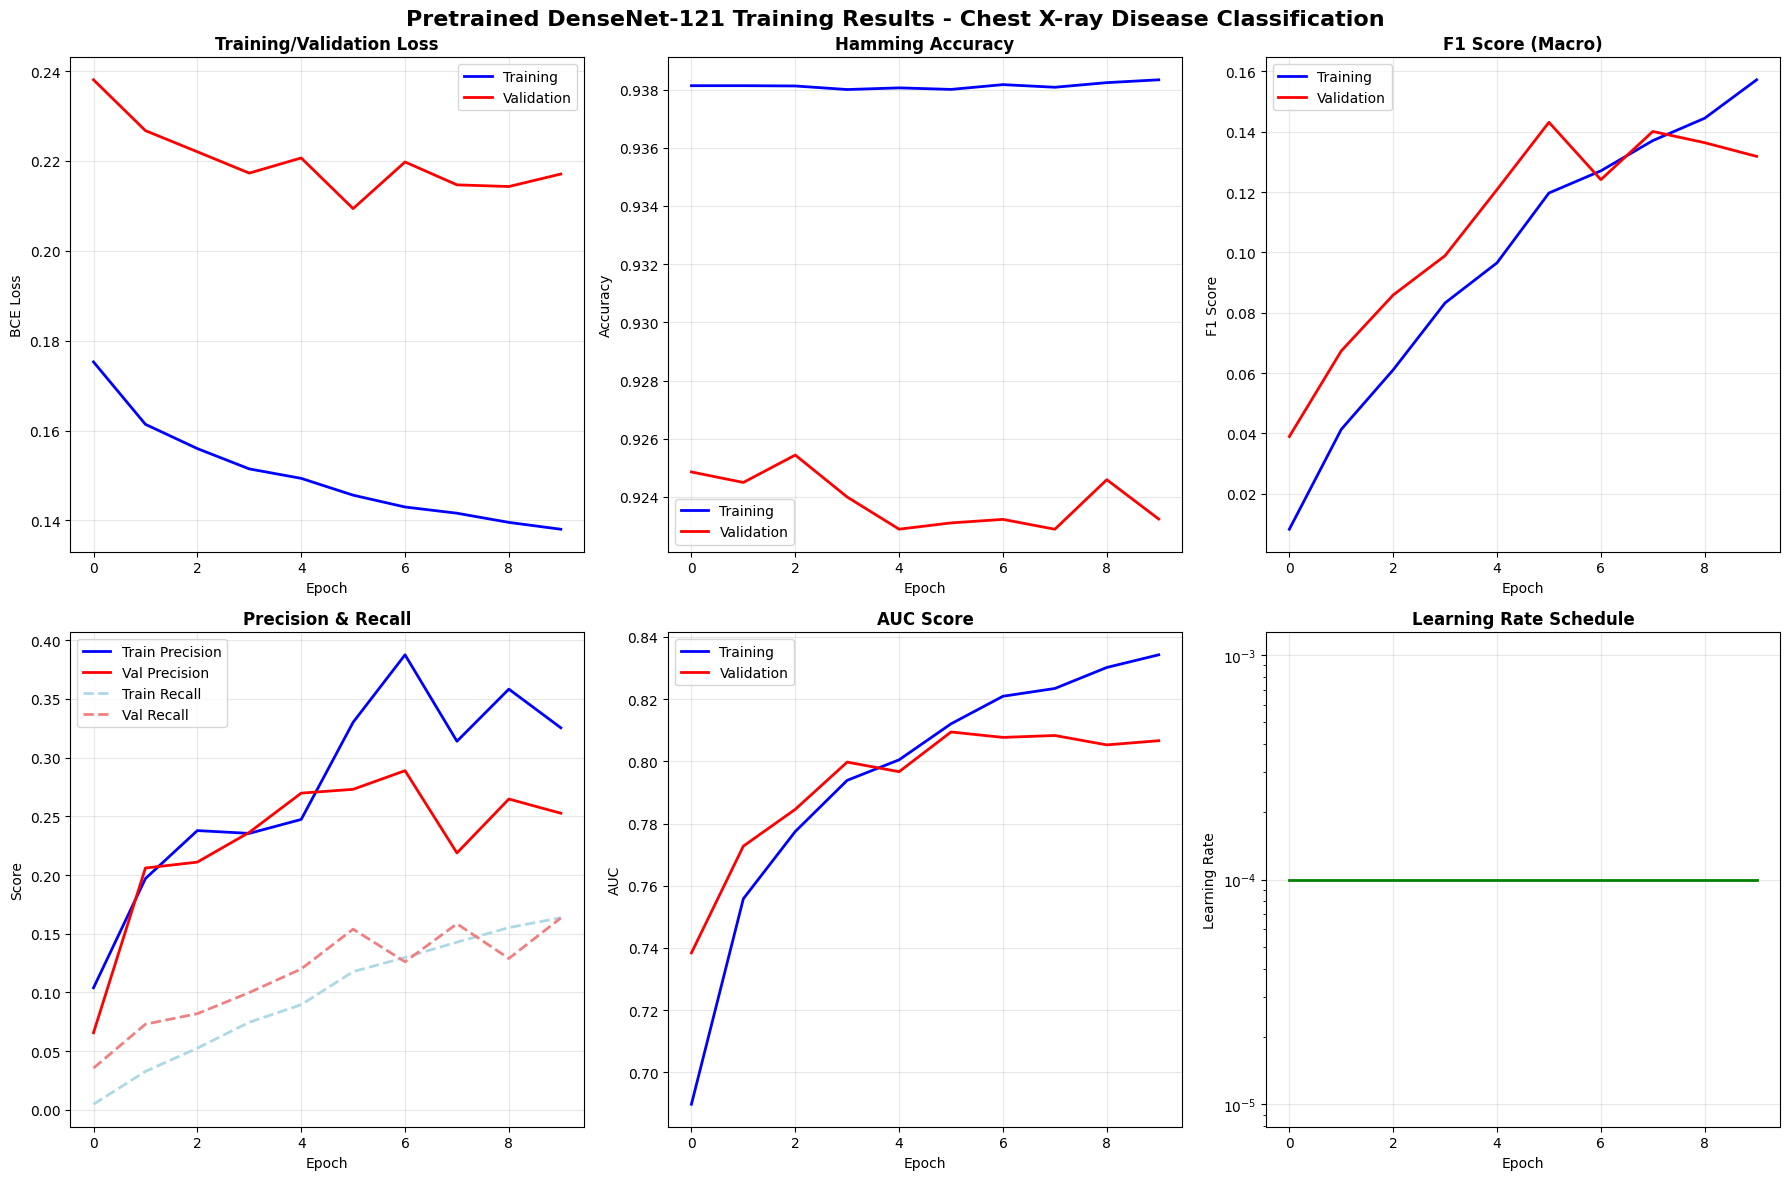

FINAL TRAINING SUMMARY
--------------------------------------------------------------------------------
 Model Performance:
  Best Validation Loss    : 0.2094
  Final Training Loss     : 0.1380
  Final Validation Loss   : 0.2171
  Final Val Hamming Acc   : 0.9232
  Final Val F1 Score      : 0.1318
  Final Val Precision     : 0.2527
  Final Val Recall        : 0.1634
  Final Val AUC           : 0.8066

Training Configuration:
  Model                   : Pretrained DenseNet-121
  Total Parameters        : 7,488,916
  Training Epochs         : 10
  Dataset Size            : 78,506 train / 12,533 val
  Batch Size              : 64
  Final Learning Rate     : 0.000100

Model Checkpoint:
Saved as: checkpoints/best_pretrained_densenet_121.pth


In [21]:
# Training Results Visualization and Summary
import matplotlib.pyplot as plt

print("Generating training results visualization")

# Create comprehensive training plots
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
fig.suptitle(f'{active_model_name} Training Results - Chest X-ray Disease Classification',
             fontsize=16, fontweight='bold')

# 1. Loss curves
axes[0, 0].plot(train_losses, label='Training', color='blue', linewidth=2)
axes[0, 0].plot(test_losses, label='Validation', color='red', linewidth=2)
axes[0, 0].set_title('Training/Validation Loss', fontweight='bold')
axes[0, 0].set_xlabel('Epoch')
axes[0, 0].set_ylabel('BCE Loss')
axes[0, 0].legend()
axes[0, 0].grid(True, alpha=0.3)

# 2. Hamming Accuracy
axes[0, 1].plot(train_metrics_history['hamming_accuracy'], label='Training', color='blue', linewidth=2)
axes[0, 1].plot(test_metrics_history['hamming_accuracy'], label='Validation', color='red', linewidth=2)
axes[0, 1].set_title('Hamming Accuracy', fontweight='bold')
axes[0, 1].set_xlabel('Epoch')
axes[0, 1].set_ylabel('Accuracy')
axes[0, 1].legend()
axes[0, 1].grid(True, alpha=0.3)

# 3. F1 Score
axes[0, 2].plot(train_metrics_history['f1_score'], label='Training', color='blue', linewidth=2)
axes[0, 2].plot(test_metrics_history['f1_score'], label='Validation', color='red', linewidth=2)
axes[0, 2].set_title('F1 Score (Macro)', fontweight='bold')
axes[0, 2].set_xlabel('Epoch')
axes[0, 2].set_ylabel('F1 Score')
axes[0, 2].legend()
axes[0, 2].grid(True, alpha=0.3)

# 4. Precision and Recall
axes[1, 0].plot(train_metrics_history['precision'], label='Train Precision', color='blue', linewidth=2)
axes[1, 0].plot(test_metrics_history['precision'], label='Val Precision', color='red', linewidth=2)
axes[1, 0].plot(train_metrics_history['recall'], label='Train Recall', color='lightblue', linewidth=2, linestyle='--')
axes[1, 0].plot(test_metrics_history['recall'], label='Val Recall', color='lightcoral', linewidth=2, linestyle='--')
axes[1, 0].set_title('Precision & Recall', fontweight='bold')
axes[1, 0].set_xlabel('Epoch')
axes[1, 0].set_ylabel('Score')
axes[1, 0].legend()
axes[1, 0].grid(True, alpha=0.3)

# 5. AUC Score
axes[1, 1].plot(train_metrics_history['auc'], label='Training', color='blue', linewidth=2)
axes[1, 1].plot(test_metrics_history['auc'], label='Validation', color='red', linewidth=2)
axes[1, 1].set_title('AUC Score', fontweight='bold')
axes[1, 1].set_xlabel('Epoch')
axes[1, 1].set_ylabel('AUC')
axes[1, 1].legend()
axes[1, 1].grid(True, alpha=0.3)

# 6. Learning Rate Schedule
axes[1, 2].plot(learning_rates, color='green', linewidth=2)
axes[1, 2].set_title('Learning Rate Schedule', fontweight='bold')
axes[1, 2].set_xlabel('Epoch')
axes[1, 2].set_ylabel('Learning Rate')
axes[1, 2].set_yscale('log')
axes[1, 2].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Training Summary

print("FINAL TRAINING SUMMARY")
print(f"{'-'*80}")

# Get final metrics
final_train_loss = train_losses[-1]
final_test_loss = test_losses[-1]
final_train_metrics = {k: v[-1] for k, v in train_metrics_history.items()}
final_test_metrics = {k: v[-1] for k, v in test_metrics_history.items()}

print(f" Model Performance:")
print(f"  Best Validation Loss    : {best_val_loss:.4f}")
print(f"  Final Training Loss     : {final_train_loss:.4f}")
print(f"  Final Validation Loss   : {final_test_loss:.4f}")
print(f"  Final Val Hamming Acc   : {final_test_metrics['hamming_accuracy']:.4f}")
print(f"  Final Val F1 Score      : {final_test_metrics['f1_score']:.4f}")
print(f"  Final Val Precision     : {final_test_metrics['precision']:.4f}")
print(f"  Final Val Recall        : {final_test_metrics['recall']:.4f}")
print(f"  Final Val AUC           : {final_test_metrics['auc']:.4f}")

print(f"\nTraining Configuration:")
print(f"  Model                   : {active_model_name}")
print(f"  Total Parameters        : {sum(p.numel() for p in active_model.parameters()):,}")
print(f"  Training Epochs         : {len(train_losses)}")
print(f"  Dataset Size            : {len(train_dataset):,} train / {len(val_dataset):,} val")
print(f"  Batch Size              : {batch_size}")
print(f"  Final Learning Rate     : {learning_rates[-1]:.6f}")

print(f"\nModel Checkpoint:")
checkpoint_name = f"best_{active_model_name.lower().replace(' ', '_').replace('-', '_')}.pth"
print(f"Saved as: checkpoints/{checkpoint_name}")


# Simple Model Evaluation

Basic evaluation of the DenseNet model with essential metrics: Accuracy, Precision, Recall, F1-Score, and Confusion Matrix.

In [23]:
# Simple Model Evaluation and Testing
import torch
import numpy as np
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import multilabel_confusion_matrix, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Evaluate model on test set
def simple_evaluation(model, test_loader, device):
    model.eval()
    all_predictions = []
    all_targets = []

    print("Evaluating model on test set...")
    with torch.no_grad():
        for batch_idx, (images, targets) in enumerate(test_loader):
            images, targets = images.to(device), targets.to(device)

            # Get model predictions
            outputs = model(images)
            probabilities = torch.sigmoid(outputs)
            predictions = (probabilities >= 0.5).float()

            all_predictions.append(predictions.cpu().numpy())
            all_targets.append(targets.cpu().numpy())

            if batch_idx % 10 == 0:
                print(f"Processing batch {batch_idx}/{len(test_loader)}")

    # Combine all predictions and targets
    y_pred = np.vstack(all_predictions)
    y_true = np.vstack(all_targets)

    return y_true, y_pred

# Run evaluation
print(f"Using model: {active_model.__class__.__name__}")
print(f"Model name: {active_model_name}")
print(f"Test set size: {len(test_dataset)} images")
print(f"Number of classes: {num_classes}")

y_true, y_pred = simple_evaluation(active_model, test_loader, device)

print(f"Predictions shape: {y_pred.shape}")
print(f"Targets shape: {y_true.shape}")

Using model: PretrainedDenseNet121MultiLabel
Model name: Pretrained DenseNet-121
Test set size: 21081 images
Number of classes: 20
Evaluating model on test set...
Processing batch 0/330
Processing batch 10/330
Processing batch 20/330
Processing batch 30/330
Processing batch 40/330
Processing batch 50/330
Processing batch 60/330
Processing batch 70/330
Processing batch 80/330
Processing batch 90/330
Processing batch 100/330
Processing batch 110/330
Processing batch 120/330
Processing batch 130/330
Processing batch 140/330
Processing batch 150/330
Processing batch 160/330
Processing batch 170/330
Processing batch 180/330
Processing batch 190/330
Processing batch 200/330
Processing batch 210/330
Processing batch 220/330
Processing batch 230/330
Processing batch 240/330
Processing batch 250/330
Processing batch 260/330
Processing batch 270/330
Processing batch 280/330
Processing batch 290/330
Processing batch 300/330
Processing batch 310/330
Processing batch 320/330
Predictions shape: (210

In [29]:
# Calculate Simple Metrics
# Calculate overall metrics
print("Calculating metrics")

# Accuracy (Hamming accuracy for multi-label)
hamming_accuracy = 1 - np.mean(np.not_equal(y_true, y_pred))

# Precision, Recall, F1 (macro average)
precision = precision_score(y_true, y_pred, average='macro', zero_division=0)
recall = recall_score(y_true, y_pred, average='macro', zero_division=0)
f1 = f1_score(y_true, y_pred, average='macro', zero_division=0)

# Display results
print(f"\nOVERALL PERFORMANCE:")
print(f"{'-'*80}")
print(f"Accuracy (Hamming):  {hamming_accuracy:.4f}")
print(f"Precision (Macro):   {precision:.4f}")
print(f"Recall (Macro):      {recall:.4f}")
print(f"F1-Score (Macro):    {f1:.4f}")

# Per-class metrics
print(f"\nPER-CLASS METRICS:")
print(f"{'Class':<20} {'Precision':<12} {'Recall':<12} {'F1-Score':<12}")
print(f"{'-'*60}")

class_names = label_columns
for i, class_name in enumerate(class_names):
    class_precision = precision_score(y_true[:, i], y_pred[:, i], zero_division=0)
    class_recall = recall_score(y_true[:, i], y_pred[:, i], zero_division=0)
    class_f1 = f1_score(y_true[:, i], y_pred[:, i], zero_division=0)

    print(f"{class_name:<20} {class_precision:<12.3f} {class_recall:<12.3f} {class_f1:<12.3f}")

print("\nMetrics calculation completed!")

Calculating metrics

OVERALL PERFORMANCE:
--------------------------------------------------------------------------------
Accuracy (Hamming):  0.9232
Precision (Macro):   0.2527
Recall (Macro):      0.1634
F1-Score (Macro):    0.1318

PER-CLASS METRICS:
Class                Precision    Recall       F1-Score    
------------------------------------------------------------
Atelectasis          0.000        0.000        0.000       
Cardiomegaly         0.460        0.241        0.316       
Consolidation        0.000        0.000        0.000       
Edema                0.218        0.079        0.115       
Effusion             0.692        0.074        0.134       
Emphysema            0.475        0.447        0.461       
Fibrosis             0.062        0.003        0.005       
Hernia               0.069        0.613        0.125       
Infiltration         0.000        0.000        0.000       
Mass                 0.556        0.074        0.131       
Nodule               0.0

Generating confusion matrices


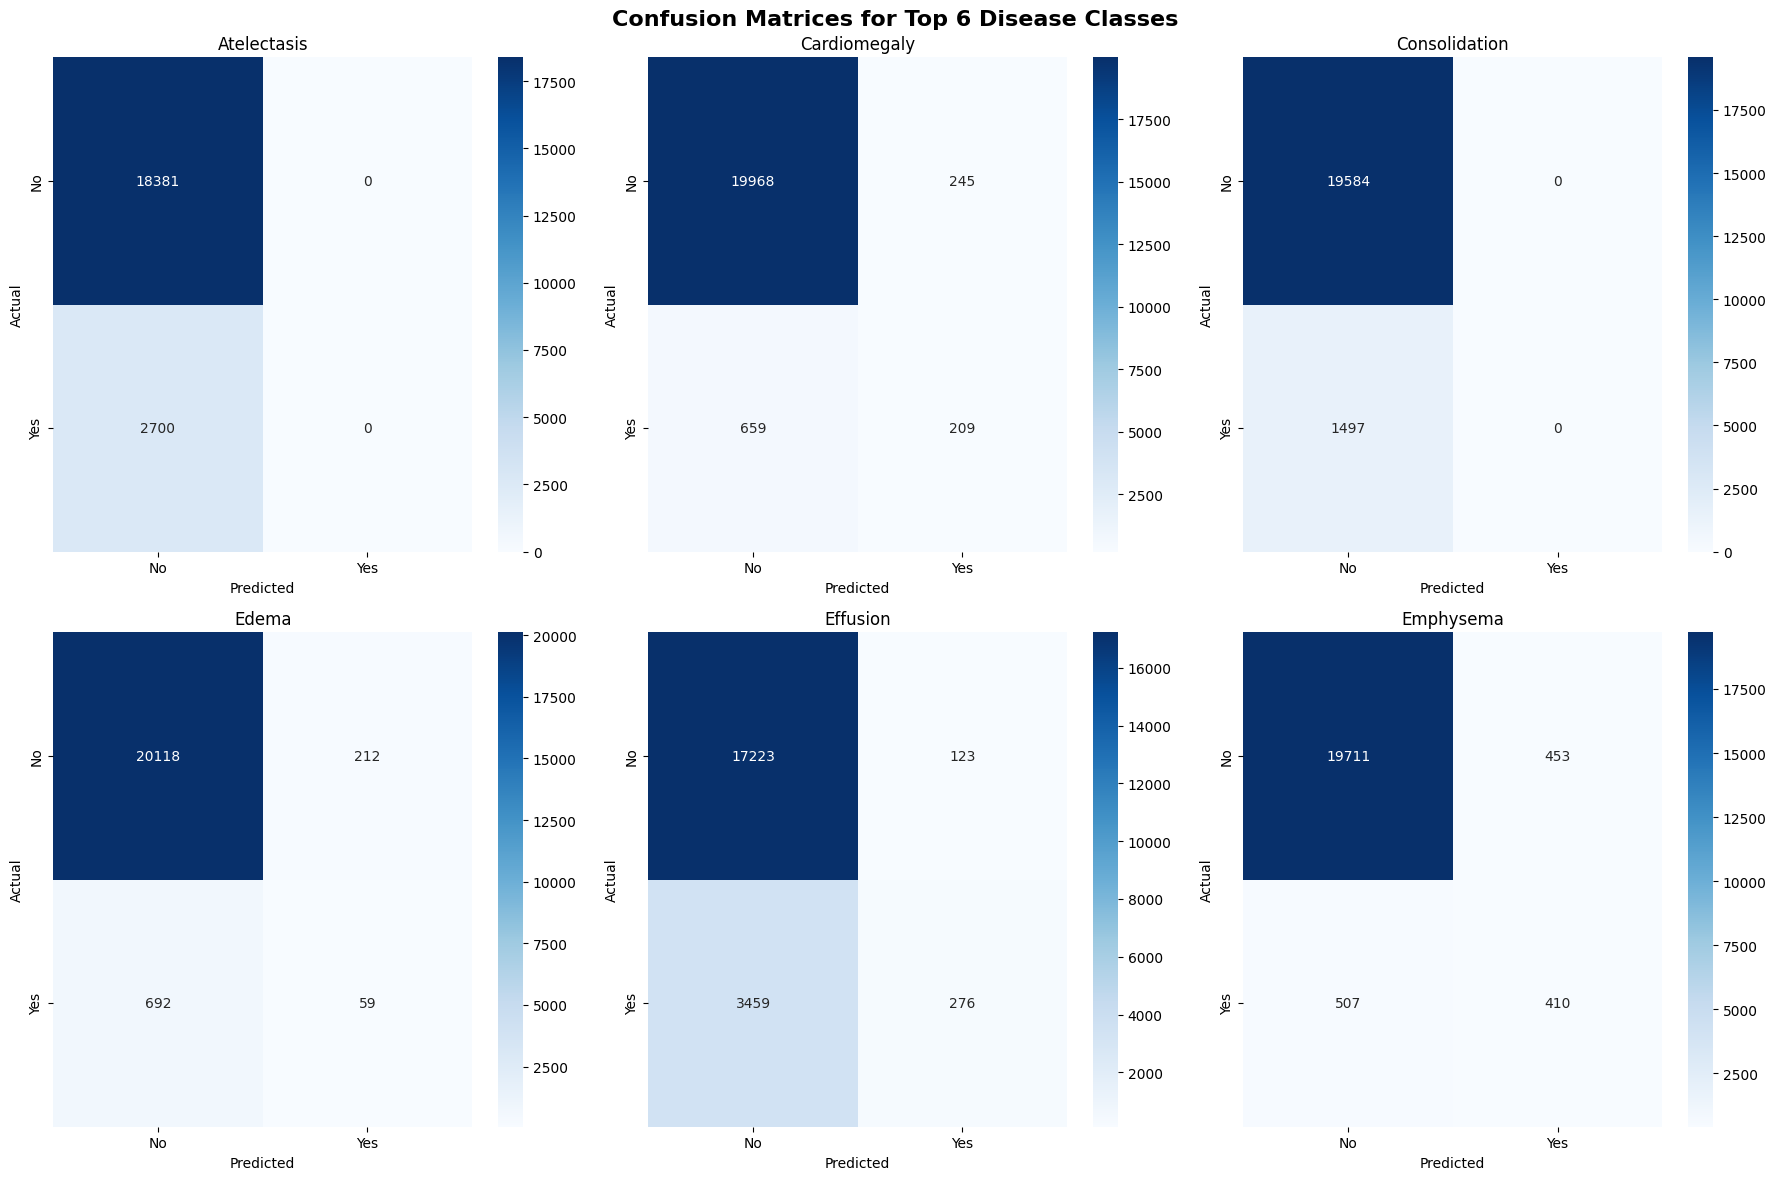


CONFUSION MATRIX SUMMARY:
----------------------------------------------------------------------
Class                TN       FP       FN       TP      
----------------------------------------------------------------------
Atelectasis          18381    0        2700     0       
Cardiomegaly         19968    245      659      209     
Consolidation        19584    0        1497     0       
Edema                20118    212      692      59      
Effusion             17223    123      3459     276     
Emphysema            19711    453      507      410     
Fibrosis             20701    15       364      1       
Hernia               20510    509      24       38      
Infiltration         15922    0        5159     0       
Mass                 19673    79       1230     99      
Nodule               19776    0        1305     0       
Pleural Thickening   20179    0        902      0       
Pneumonia            20629    0        452      0       
Pneumothorax         18836    139

In [30]:
# Confusion Matrix Visualization


# Calculate confusion matrices for each class
print("Generating confusion matrices")

# Create a subplot for confusion matrices (showing top 6 classes)
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
fig.suptitle('Confusion Matrices for Top 6 Disease Classes', fontsize=16, fontweight='bold')

axes = axes.flatten()

# Show confusion matrices for first 6 classes
for i in range(min(6, len(class_names))):
    class_name = class_names[i]

    # Get binary confusion matrix for this class
    cm = confusion_matrix(y_true[:, i], y_pred[:, i])

    # Plot confusion matrix
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'],
                ax=axes[i])
    axes[i].set_title(f'{class_name}')
    axes[i].set_xlabel('Predicted')
    axes[i].set_ylabel('Actual')

plt.tight_layout()
plt.show()

# Overall confusion matrix statistics
print(f"\nCONFUSION MATRIX SUMMARY:")
print(f"{'-'*70}")
print(f"{'Class':<20} {'TN':<8} {'FP':<8} {'FN':<8} {'TP':<8}")
print(f"{'-'*70}")

for i, class_name in enumerate(class_names):
    cm = confusion_matrix(y_true[:, i], y_pred[:, i])
    if cm.shape == (2, 2):
        tn, fp, fn, tp = cm.ravel()
    else:
        # Handle cases where only one class is present
        if cm.shape == (1, 1):
            if np.all(y_true[:, i] == 0):  # Only negative examples
                tn, fp, fn, tp = cm[0, 0], 0, 0, 0
            else:  # Only positive examples
                tn, fp, fn, tp = 0, 0, 0, cm[0, 0]
        else:
            tn, fp, fn, tp = 0, 0, 0, 0

    print(f"{class_name:<20} {tn:<8d} {fp:<8d} {fn:<8d} {tp:<8d}")

print("\nConfusion matrix analysis completed!")

In [31]:

print(f"\nMODEL PERFORMANCE SUMMARY:")
print(f"Overall Accuracy:     {hamming_accuracy:.4f}")
print(f"Macro Precision:      {precision:.4f}")
print(f"Macro Recall:         {recall:.4f}")
print(f"Macro F1-Score:       {f1:.4f}")

# print(f"\n🏆 BEST PERFORMING CLASSES (Top 3 by F1-Score):")
# print(f"{'='*50}")

# # Calculate per-class F1 scores for ranking
# class_f1_scores = []
# for i, class_name in enumerate(class_names):
#     class_f1 = f1_score(y_true[:, i], y_pred[:, i], zero_division=0)
#     class_f1_scores.append((class_name, class_f1))

# # Sort by F1 score
# class_f1_scores.sort(key=lambda x: x[1], reverse=True)

# for i, (class_name, class_f1) in enumerate(class_f1_scores[:3]):
#     print(f"{i+1}. {class_name}: {class_f1:.3f}")

# print(f"\nCLASSES NEEDING IMPROVEMENT (Bottom 3 by F1-Score):")
# print(f"{'='*50}")

# for i, (class_name, class_f1) in enumerate(class_f1_scores[-3:]):
#     print(f"{i+1}. {class_name}: {class_f1:.3f}")


MODEL PERFORMANCE SUMMARY:
Overall Accuracy:     0.9232
Macro Precision:      0.2527
Macro Recall:         0.1634
Macro F1-Score:       0.1318


In [28]:
!cp /content/checkpoints/best_pretrained_densenet_121.pth /content/drive/MyDrive/uni/code/Disease-Diagnosis-Deep-Learning/checkpoints